In [1]:
import skimage 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import ndimage, stats, signal 
import math
import pandas as pd

%matplotlib inline

In [4]:
inputdir = "/Users/sbandya/Google Drive/0_projects/hemocyte_ImageSegmentation/quantification/"
conditioned = pd.read_csv(inputdir+"Conditioned_1D_2_20x.jpg.csv",sep=",",header=0)
conditioned = conditioned[['Area','Mean','%Area']]

starved = pd.read_csv(inputdir+"Starved_1B_4_20x_resized.tif.csv",sep=",",header=0)
starved = starved[['Area','Mean','%Area']]

merged = pd.merge(conditioned,starved,on="Area")
merged.columns = ["Area","Mean Intensity - Conditioned","Conditioned","Mean Intensity - Starved","Starved"]

Text(0, 0.5, '% Area occupied by HML>GFP')

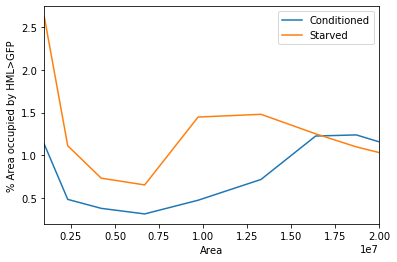

In [5]:
areaplot = merged.plot.line(x="Area",y=["Conditioned","Starved"])
areaplot.set_ylabel("% Area occupied by HML>GFP")

In [6]:
merged

,Area,Mean Intensity - Conditioned,Conditioned,Mean Intensity - Starved,Starved
0,980364,67.293,1.132,62.936,2.627
1,2317736,65.254,0.485,61.512,1.112
2,4220608,63.852,0.380,61.196,0.733
3,6688984,63.187,0.315,60.572,0.654
4,9722756,62.810,0.475,60.088,1.448
5,13295978,61.520,0.718,57.585,1.480
6,16400488,61.180,1.226,52.148,1.252
7,18712788,60.171,1.239,47.597,1.099
8,19764262,59.463,1.173,45.297,1.045
9,20000000,59.312,1.159,44.763,1.033


Text(0, 0.5, '% Area occupied by HML>GFP')

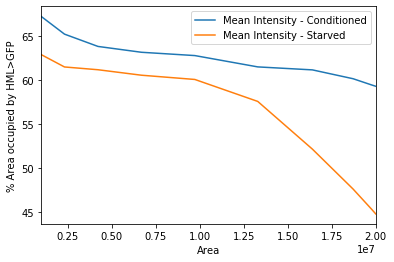

In [7]:
areaplot = merged.plot.line(x="Area",y=["Mean Intensity - Conditioned","Mean Intensity - Starved"])
areaplot.set_ylabel("% Area occupied by HML>GFP")

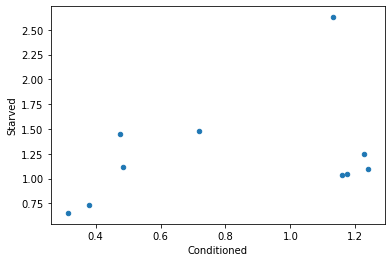

In [8]:
compare = merged.plot.scatter(x="Conditioned",y="Starved")
#compare.set_ylabel("% Area occupied by HML>GFP")

In [9]:
pip install --user similaritymeasures

You are using pip version 19.0.3, however version 21.2.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import similaritymeasures
frechet_distance = similaritymeasures.frechet_dist(np.array(merged[['Area','Conditioned']]), np.array(merged[['Area','Starved']]))
frechet_distance

1.4949999999999997

In [14]:
import scipy 
res = scipy.stats.cramervonmises_2samp(np.array(merged['Conditioned']), np.array(merged['Starved']), method='exact')
res.statistic, res.pvalue

(0.2849999999999997, 0.16607850353980386)

In [15]:
import scipy 
res = scipy.stats.cramervonmises_2samp(np.array(merged['Conditioned']), np.array(merged['Starved']), method='asymptotic')
res.statistic, res.pvalue

(0.2849999999999997, 0.15425055759304185)